In [2]:
# !pip install tensorflow-gpu

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [39 lines of output]
      Traceback (most recent call last):
        File "c:\Users\fins6\anaconda3\envs\ds_study\lib\site-packages\setuptools\_vendor\packaging\requirements.py", line 35, in __init__
          parsed = _parse_requirement(requirement_string)
        File "c:\Users\fins6\anaconda3\envs\ds_study\lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 64, in parse_requirement
          return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
        File "c:\Users\fins6\anaconda3\envs\ds_study\lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 82, in _parse_requirement
          url, specifier, marker = _parse_requirement_details(tokenizer)
        File "c:\Users\fins6\anaconda3\envs\ds_study\lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 126, in _parse_requirement_details
          marker = _parse_require

In [3]:
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers

In [4]:
'''
Conv2D layer는 32개의 필터를 가지고, 각 필터의 크기는 5x5, 필터가 input data를 한번에 한 픽셀씩 이동하며 적용됨
MaxPooling2D 레이어는 풀링 크기를 2x2로 설정, 이동거리도 2x2
Conv2D(2nd) layer는 64개의 필터를 쓰고, 필터 크기 2x2, 더 많은 feature를 extract함.
MaxPooling2D(2nd) 레이어도 풀링 크기를 2x2로 설정
Dropout layer는 학습시 25%의 노드를 비활성화 하여 학습 - overfitting 예방
'''
model = tf.keras.models.Sequential([
    layers.Conv2D(32, kernel_size=(5,5), strides=(1,1),
                  padding='same', activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    layers.Conv2D(64, (2,2), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [5]:
model

In [6]:
from tensorflow.keras import datasets

mnist = datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train/ 255.0, X_test / 255.0

X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

In [7]:
model = tf.keras.models.Sequential([
    layers.Conv2D(32, kernel_size=(5,5), strides=(1,1),
                  padding='same', activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    layers.Conv2D(64, (2,2), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 64)          0         
                                                                 
 flatten_1 (Flatten)         (None, 3136)             

In [8]:
import time
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

start_time = time.time()
hist = model.fit(X_train, y_train, epochs=5, verbose=1,
                 validation_data=(X_test, y_test))
print('fit time : ', time.time() - start_time)

Epoch 1/5
1875/1875 [==============================] - 56s 29ms/step - loss: 0.1131 - accuracy: 0.9638 - val_loss: 0.0410 - val_accuracy: 0.9869
Epoch 2/5
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0441 - accuracy: 0.9866 - val_loss: 0.0407 - val_accuracy: 0.9875
Epoch 3/5
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0332 - accuracy: 0.9897 - val_loss: 0.0537 - val_accuracy: 0.9837
Epoch 4/5
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0255 - accuracy: 0.9920 - val_loss: 0.0332 - val_accuracy: 0.9905
Epoch 5/5
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0204 - accuracy: 0.9934 - val_loss: 0.0272 - val_accuracy: 0.9914
fit time :  281.37076354026794


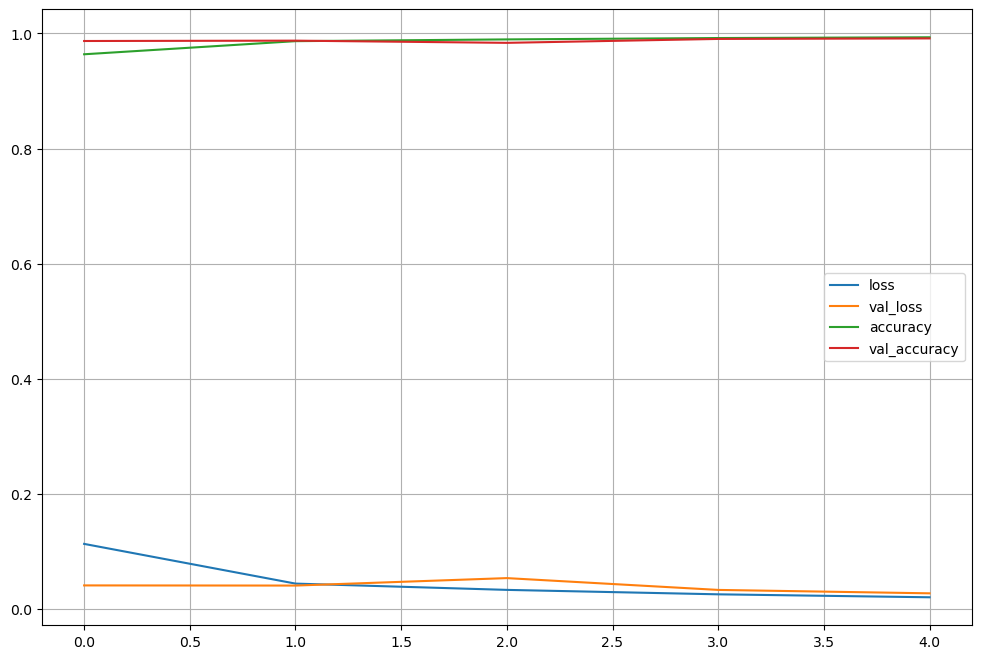

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']

plt.figure(figsize=(12,8))

for each in plot_target:
    plt.plot(hist.history[each], label=each)

plt.legend()
plt.grid()
plt.show()

In [10]:
score = model.evaluate(X_test, y_test)
print('Test loss : ', score[0])
print('Test accuracy : ',score[1])

313/313 [==============================] - 2s 6ms/step - loss: 0.0272 - accuracy: 0.9914
Test loss :  0.027234496548771858
Test accuracy :  0.9914000034332275


In [11]:
import numpy as np

predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result, axis=1)
predicted_labels[:10]

313/313 [==============================] - 2s 6ms/step


array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

In [12]:
wrong_result = []

for n in range(0, len(y_test)):
    if predicted_labels[n] != y_test[n]:
        wrong_result.append(n)

len(wrong_result)

86

In [13]:
import random

samples = random.choices(population=wrong_result, k=16)
samples

[1319,
 1114,
 4284,
 3808,
 9692,
 3985,
 3558,
 445,
 4443,
 1114,
 4284,
 1393,
 7216,
 6091,
 3422,
 1987]

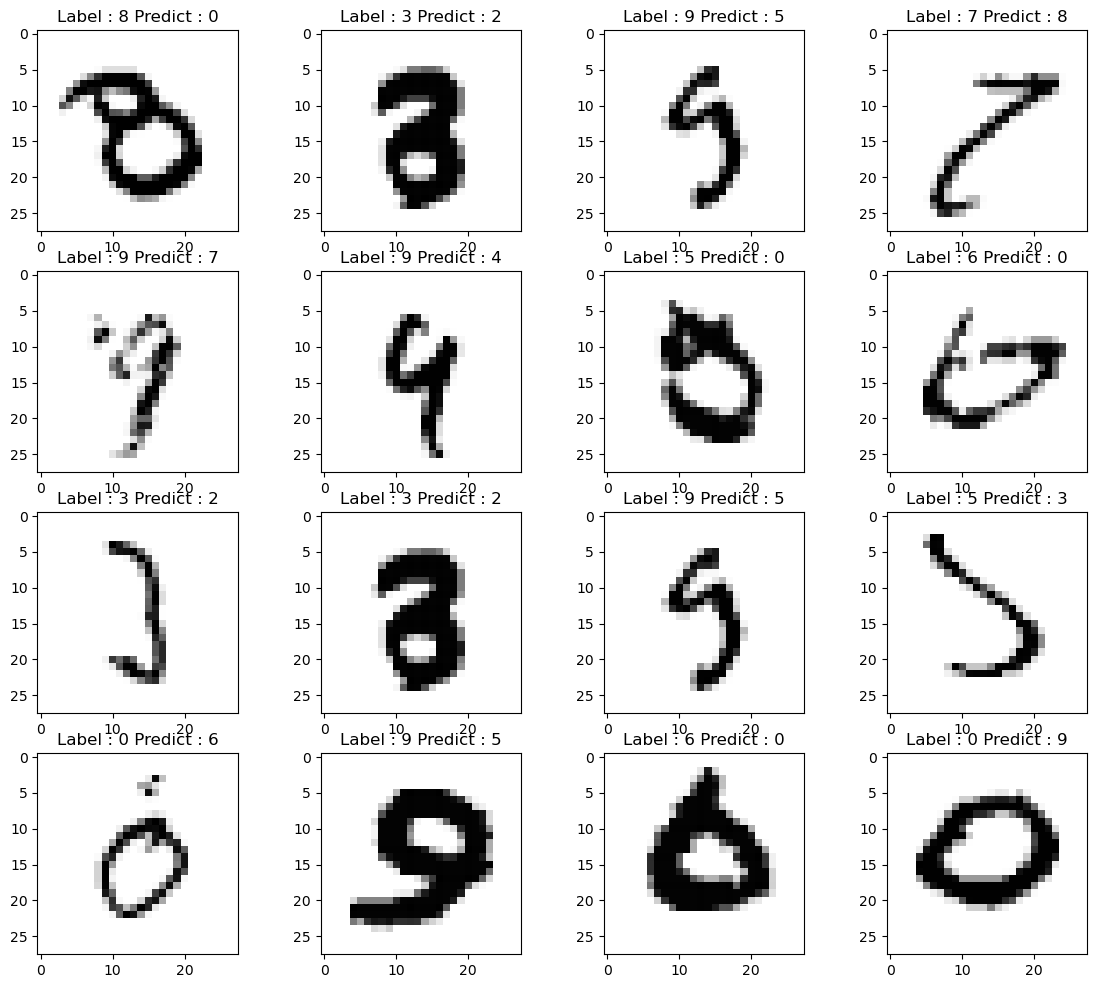

In [14]:
plt.figure(figsize=(14,12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(X_test[n].reshape(28,28), cmap='Greys', interpolation='nearest')
    plt.title('Label : '+str(y_test[n]) + ' Predict : ' + str(predicted_labels[n]))
    
plt.show()

In [15]:
model.save('MNIST_CNN_model.h5')

c:\Users\fins6\anaconda3\envs\ds_study\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [16]:
from tensorflow.keras import datasets

mnist = datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train/ 255.0, X_test / 255.0

X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

In [17]:
model = tf.keras.models.Sequential([
    layers.Conv2D(32, kernel_size=(5,5), strides=(1,1),
                  padding='same', activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    layers.Conv2D(64, (2,2), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 7, 7, 64)          0         
                                                                 
 flatten_2 (Flatten)         (None, 3136)             

In [18]:
import time
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

start_time = time.time()
hist = model.fit(X_train, y_train, epochs=5, verbose=1,
                 validation_data=(X_test, y_test))
print('fit time : ', time.time() - start_time)

Epoch 1/5
1875/1875 [==============================] - 54s 28ms/step - loss: 0.3954 - accuracy: 0.8556 - val_loss: 0.3279 - val_accuracy: 0.8773
Epoch 2/5
1875/1875 [==============================] - 54s 29ms/step - loss: 0.2689 - accuracy: 0.9007 - val_loss: 0.2856 - val_accuracy: 0.8897
Epoch 3/5
1875/1875 [==============================] - 54s 29ms/step - loss: 0.2260 - accuracy: 0.9166 - val_loss: 0.2412 - val_accuracy: 0.9121
Epoch 4/5
1875/1875 [==============================] - 55s 30ms/step - loss: 0.1943 - accuracy: 0.9270 - val_loss: 0.2500 - val_accuracy: 0.9132
Epoch 5/5
1875/1875 [==============================] - 55s 29ms/step - loss: 0.1710 - accuracy: 0.9358 - val_loss: 0.2400 - val_accuracy: 0.9167
fit time :  272.69451212882996


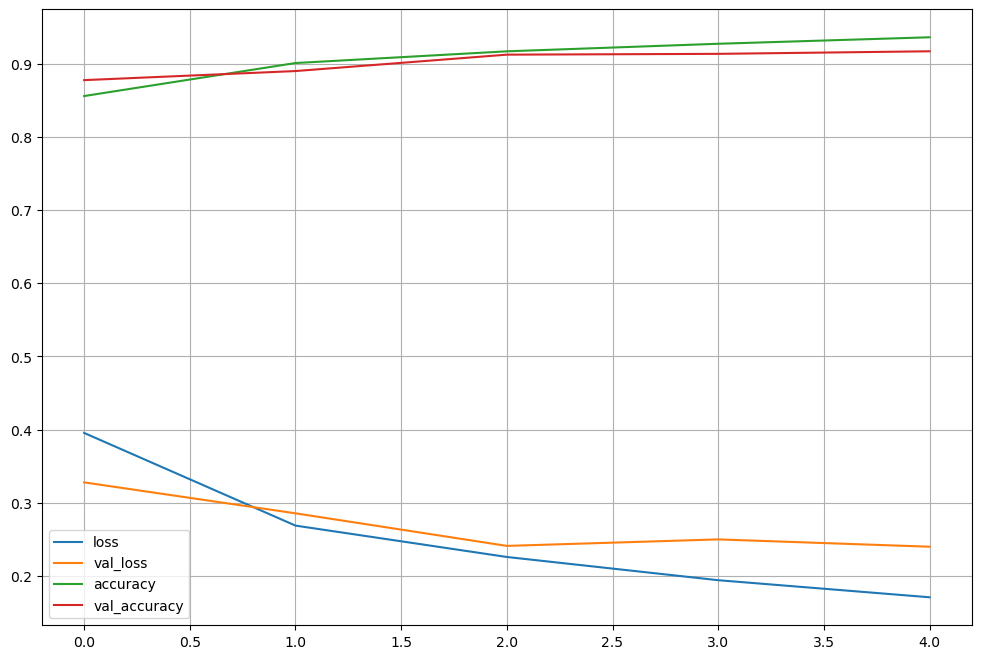

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']

plt.figure(figsize=(12,8))

for each in plot_target:
    plt.plot(hist.history[each], label=each)

plt.legend()
plt.grid()
plt.show()

In [20]:
score = model.evaluate(X_test, y_test)
print('Test loss : ', score[0])
print('Test accuracy : ',score[1])

313/313 [==============================] - 2s 6ms/step - loss: 0.2400 - accuracy: 0.9167
Test loss :  0.24004070460796356
Test accuracy :  0.916700005531311


In [21]:
import numpy as np

predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result, axis=1)
predicted_labels[:10]

313/313 [==============================] - 2s 6ms/step


array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=int64)

In [22]:
wrong_result = []

for n in range(0, len(y_test)):
    if predicted_labels[n] != y_test[n]:
        wrong_result.append(n)

len(wrong_result)

833

In [23]:
samples = random.choices(population=wrong_result, k=16)
samples

[2548,
 6163,
 511,
 9748,
 7769,
 8454,
 9604,
 6147,
 753,
 4142,
 9554,
 8669,
 7992,
 3970,
 9957,
 5469]

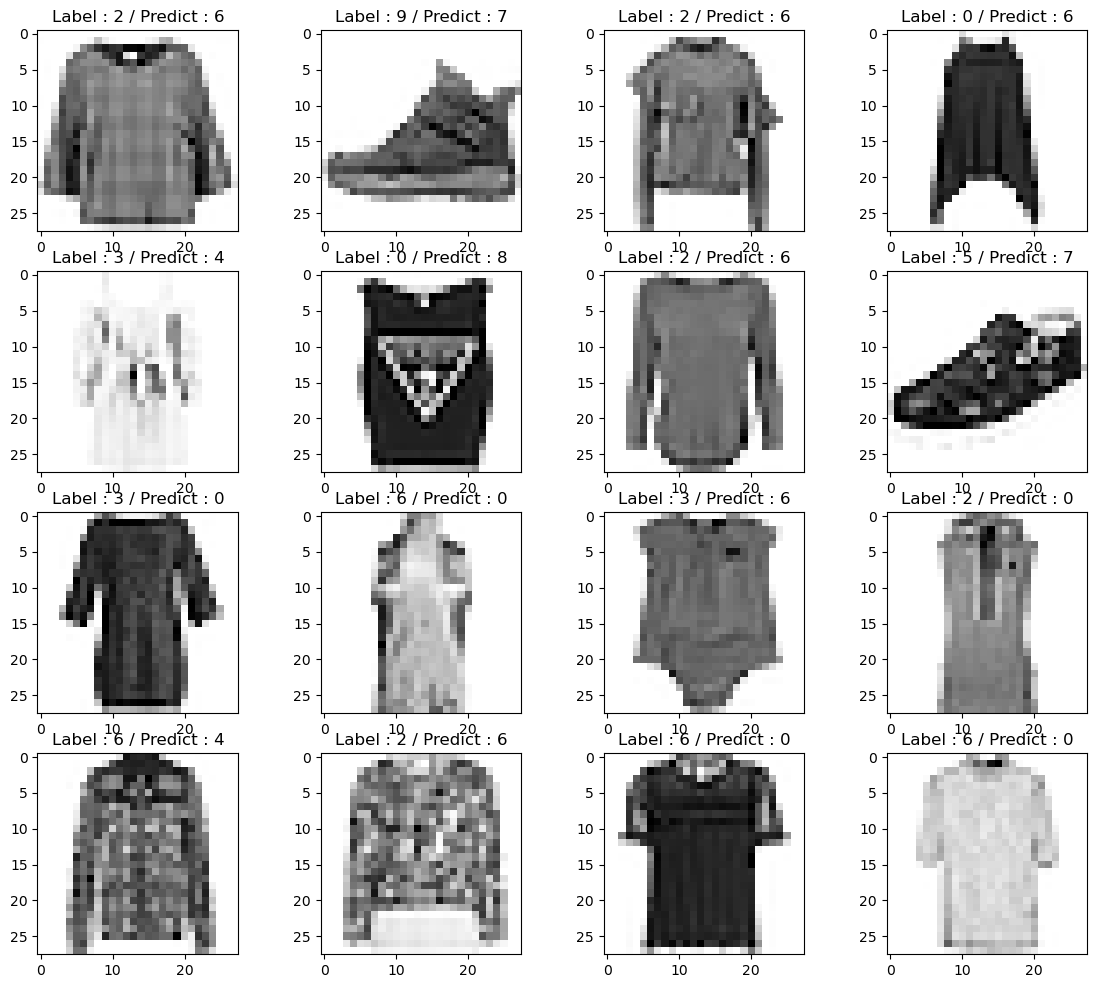

In [25]:
plt.figure(figsize=(14,12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(X_test[n].reshape(28,28), cmap='Greys', interpolation='nearest')
    plt.title('Label : '+str(y_test[n]) + ' / Predict : ' + str(predicted_labels[n]))
    
plt.show()